In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df_temp = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df_temp

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [4]:
scaler = MinMaxScaler(feature_range = (0,1))
df_temp['Temp'] = scaler.fit_transform(df_temp[['Temp']])
df_temp

,Temp
Date,
1981-01-01,0.787072
1981-01-02,0.680608
1981-01-03,0.714829
1981-01-04,0.555133
1981-01-05,0.600760
...,...
1990-12-27,0.532319
1990-12-28,0.517110
1990-12-29,0.513308


In [5]:
def crear_secuencia(data, time_steps):
    X, y = [], []
    for i in range (len(data) - time_steps):
        X.append(data[i:(i+time_steps)])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

crear_secuencia(df_temp['Temp'].values, 5)

ventana = 7
data = df_temp['Temp'].values

X,y = crear_secuencia(data, ventana)

In [6]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X

array([[[0.78707224],
        [0.68060837],
        [0.7148289 ],
        ...,
        [0.60076046],
        [0.60076046],
        [0.60076046]],

       [[0.68060837],
        [0.7148289 ],
        [0.55513308],
        ...,
        [0.60076046],
        [0.60076046],
        [0.66159696]],

       [[0.7148289 ],
        [0.55513308],
        [0.60076046],
        ...,
        [0.60076046],
        [0.66159696],
        [0.82889734]],

       ...,

       [[0.50190114],
        [0.52851711],
        [0.38022814],
        ...,
        [0.55513308],
        [0.53231939],
        [0.51711027]],

       [[0.52851711],
        [0.38022814],
        [0.4904943 ],
        ...,
        [0.53231939],
        [0.51711027],
        [0.51330798]],

       [[0.38022814],
        [0.4904943 ],
        [0.55513308],
        ...,
        [0.51711027],
        [0.51330798],
        [0.59695817]]])

In [7]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [9]:
modelo = Sequential ([
    LSTM(50, activation='relu', input_shape=(ventana, 1)),
    Dense(1) #Para la salida
])
modelo.compile(optimizer = 'adam', loss = 'mse')

history = modelo.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data=(X_test,y_test), verbose=1)

Epoch 1/50
92/92 [==============================] - 2s 13ms/step - loss: 0.0530 - val_loss: 0.0105
Epoch 2/50
92/92 [==============================] - 1s 15ms/step - loss: 0.0117 - val_loss: 0.0096
Epoch 3/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0113 - val_loss: 0.0094
Epoch 4/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0111 - val_loss: 0.0092
Epoch 5/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0109 - val_loss: 0.0090
Epoch 6/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0107 - val_loss: 0.0089
Epoch 7/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0103 - val_loss: 0.0084
Epoch 8/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0100 - val_loss: 0.0081
Epoch 9/50
92/92 [==============================] - 1s 11ms/step - loss: 0.0098 - val_loss: 0.0079
Epoch 10/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 11/

In [10]:
loss = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}')

23/23 [==============================] - 0s 4ms/step - loss: 0.0074
Loss: 0.007414111867547035


In [11]:
y_pred = modelo.predict(X_test)
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred)

23/23 [==============================] - 0s 3ms/step


In [12]:
y_pred_real

array([[0.5104164 ],
       [0.5758662 ],
       [0.60669106],
       [0.57165134],
       [0.45721316],
       [0.42602634],
       [0.4857651 ],
       [0.551656  ],
       [0.5563874 ],
       [0.4902841 ],
       [0.46550888],
       [0.49911195],
       [0.46421158],
       [0.5066979 ],
       [0.5848836 ],
       [0.6194898 ],
       [0.5548142 ],
       [0.51047975],
       [0.50411713],
       [0.57823104],
       [0.5301832 ],
       [0.55190766],
       [0.48048735],
       [0.4852558 ],
       [0.5417145 ],
       [0.55965304],
       [0.568093  ],
       [0.6398527 ],
       [0.6491261 ],
       [0.5756467 ],
       [0.59380716],
       [0.587415  ],
       [0.5495975 ],
       [0.6019282 ],
       [0.5661193 ],
       [0.5305538 ],
       [0.50616646],
       [0.5910792 ],
       [0.61548775],
       [0.57523257],
       [0.54808104],
       [0.57011855],
       [0.5523578 ],
       [0.6184454 ],
       [0.6245138 ],
       [0.64862543],
       [0.6446874 ],
       [0.655

In [13]:
indices_test = df_temp.index[train_size+ventana:train_size+ventana+len(y_pred_real)]
resultados = pd.DataFrame({'Fecha': indices_test,
                           'Temperatura Real': y_test_real.flatten(),
                           'Temperatura Predicción': y_pred_real.flatten()} )
resultados

,Fecha,Temperatura Real,Temperatura Predicción
0,1989-01-02,0.661597,0.510416
1,1989-01-03,0.703422,0.575866
2,1989-01-04,0.638783,0.606691
3,1989-01-05,0.437262,0.571651
4,1989-01-06,0.361217,0.457213
...,...,...,...
724,1990-12-27,0.532319,0.509291
725,1990-12-28,0.517110,0.495822
726,1990-12-29,0.513308,0.494097
727,1990-12-30,0.596958,0.490885


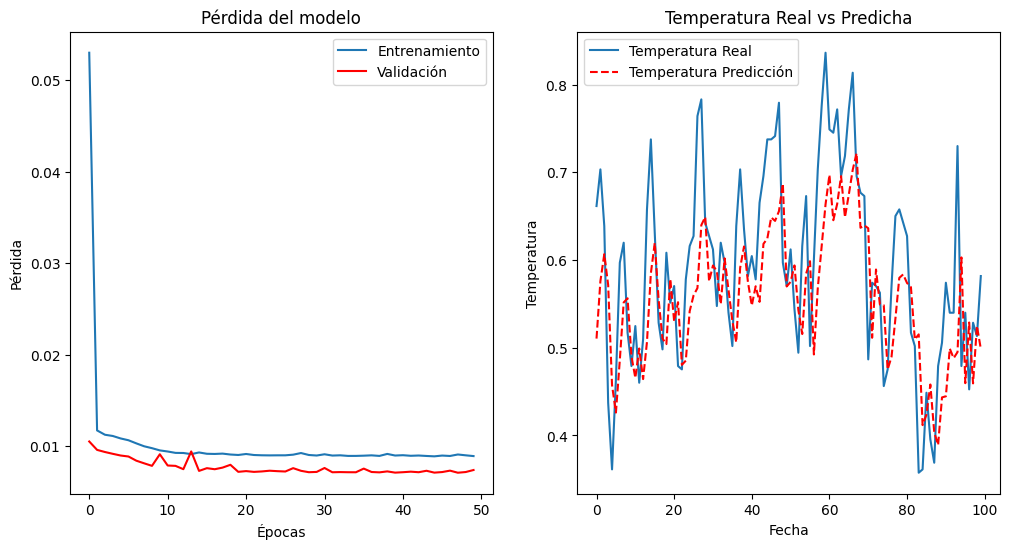

In [14]:
# Generar gráfica que genere función de pérdida y resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], 'r', label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resultados['Temperatura Real'][:100], label='Temperatura Real')
plt.plot(resultados['Temperatura Predicción'][:100], 'r--', label='Temperatura Predicción')
plt.title('Temperatura Real vs Predicha')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend()

In [ ]:
# DataSet de Pasajeros
# from statsmodels.datasets import get_rdataset
# df_airline = get_rdataset("AirPassengers".data)
# df_airline.head()

# Ejercicio precio de acciones de Apple

In [2]:
import yfinance as yf
df_apple = yf.download('AAPL', start='2022-01-01', end='2023-10-01')
df_apple.info

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<bound method DataFrame.info of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.879898  179.734947  174.653859  174.771790  104487900
2022-01-04  176.609619  179.793905  176.039592  179.489238   99310400
2022-01-05  171.911850  177.071564  171.636666  176.521197   94537600
2022-01-06  169.042068  172.285320  168.688259  169.730027   96904000
2022-01-07  169.209152  171.145275  168.088758  169.916771   86709100
...                ...         ...         ...         ...        ...
2023-09-25  174.798859  175.682382  172.882893  172.932533   46172700
2023-09-26  170.708832  173.925248  170.411012  173.548023   64588900
2023-09-27  169.189957  171.780967  167.820008  171.364025   66921800
2023-09-28  169.448059  170.778306  166.400389  168.107876   56294400
2023-09-29  169.964294  171.810762  169.100614  170.768399

In [ ]:
df_apple = df_apple[["Close"]]

In [6]:
scaler = MinMaxScaler(feature_range = (0,1))
df_apple[["Close"]] = scaler.fit_transform(df_apple[["Close"]])
df_apple

C:\Users\USER\AppData\Local\Temp\ipykernel_23072\1273665658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apple[["Close"]] = scaler.fit_transform(df_apple[["Close"]])


Price,Close
Ticker,AAPL
Date,
2022-01-03,0.776918
2022-01-04,0.745021
2022-01-05,0.679017
2022-01-06,0.638697
2022-01-07,0.641045
...,...
2023-09-25,0.719580
2023-09-26,0.662115


In [9]:
def crear_secuencia(data, time_steps):
    X, y = [], []
    for i in range (len(data) - time_steps):
        X.append(data[i:(i+time_steps)])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

crear_secuencia(df_apple[["Close"]].values, 5)

ventana = 7
data = df_apple[["Close"]].values

X,y = crear_secuencia(data, ventana)

In [11]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X

array([[[0.77691835],
        [0.745021  ],
        [0.67901749],
        ...,
        [0.64104467],
        [0.64132058],
        [0.68122673]],

       [[0.745021  ],
        [0.67901749],
        [0.63869714],
        ...,
        [0.64132058],
        [0.68122673],
        [0.68744027]],

       [[0.67901749],
        [0.63869714],
        [0.64104467],
        ...,
        [0.68122673],
        [0.68744027],
        [0.64132058]],

       ...,

       [[0.74594093],
        [0.76128386],
        [0.7113509 ],
        ...,
        [0.70158735],
        [0.71957987],
        [0.66211512]],

       [[0.76128386],
        [0.7113509 ],
        [0.68959205],
        ...,
        [0.71957987],
        [0.66211512],
        [0.64077497]],

       [[0.7113509 ],
        [0.68959205],
        [0.70158735],
        ...,
        [0.66211512],
        [0.64077497],
        [0.6444013 ]]])

In [12]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [14]:
modelo = Sequential ([
    LSTM(50, activation='relu', input_shape=(ventana, 1)),
    Dense(1) #Para la salida
])
modelo.compile(optimizer = 'adam', loss = 'mse')

history = modelo.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data=(X_test,y_test), verbose=1)

Epoch 1/30
11/11 [==============================] - 1s 22ms/step - loss: 0.1532 - val_loss: 0.4570
Epoch 2/30
11/11 [==============================] - 0s 25ms/step - loss: 0.0999 - val_loss: 0.2995
Epoch 3/30
11/11 [==============================] - 0s 12ms/step - loss: 0.0519 - val_loss: 0.1322
Epoch 4/30
11/11 [==============================] - 0s 12ms/step - loss: 0.0147 - val_loss: 0.0137
Epoch 5/30
11/11 [==============================] - 0s 12ms/step - loss: 0.0100 - val_loss: 0.0169
Epoch 6/30
11/11 [==============================] - 0s 12ms/step - loss: 0.0064 - val_loss: 0.0121
Epoch 7/30
11/11 [==============================] - 0s 12ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 8/30
11/11 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 9/30
11/11 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 10/30
11/11 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 11/

In [15]:
loss = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}')

3/3 [==============================] - 0s 4ms/step - loss: 0.0023
Loss: 0.002272658748552203


In [16]:
y_pred = modelo.predict(X_test)
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred)

3/3 [==============================] - 0s 7ms/step


In [19]:
indices_test = df_apple.index[train_size+ventana:train_size+ventana+len(y_pred_real)]
resultados = pd.DataFrame({'Fecha': indices_test,
                           'Acción Real': y_test_real.flatten(),
                           'Acción Predicción': y_pred_real.flatten()} )
resultados

,Fecha,Acción Real,Acción Predicción
0,2023-05-26,173.918701,171.222290
1,2023-05-30,175.772629,172.298676
2,2023-05-31,175.723053,173.870758
3,2023-06-01,178.538589,174.984222
4,2023-06-02,179.391159,176.420105
...,...,...,...
82,2023-09-25,174.798859,174.066086
83,2023-09-26,170.708832,174.264725
84,2023-09-27,169.189957,173.404160
85,2023-09-28,169.448059,171.855927


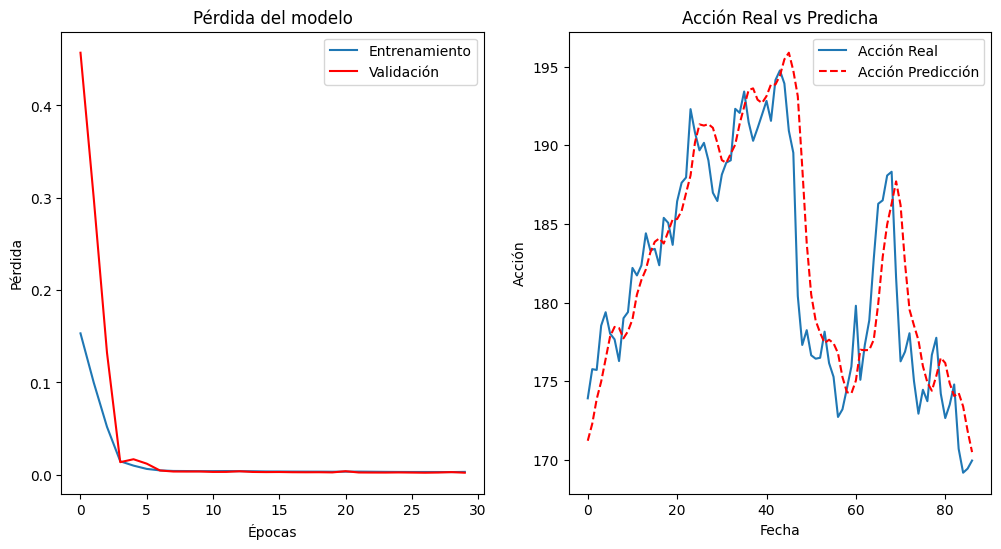

In [21]:
# Generar gráfica que genere función de pérdida y resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], 'r', label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resultados['Acción Real'][:100], label='Acción Real')
plt.plot(resultados['Acción Predicción'][:100], 'r--', label='Acción Predicción')
plt.title('Acción Real vs Predicha')
plt.xlabel('Fecha')
plt.ylabel('Acción')
plt.legend()